<div style="background-color:white">
    <img src="./imgs/hindi_hw_digits.png" />
</div>

In [1]:
import warnings

warnings.simplefilter("ignore")

import torch
import torch.nn as nn

import torchvision
from torchvision import transforms

from sklearn.metrics import accuracy_score

from ml_utils import *
from hindi.datasets import Digits

In [2]:
set_seed( 5842 )

img_transformer = transforms.Compose([
                        transforms.Grayscale(),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))
                    ])

train_dataset = Digits( "./data", train=True, transform=img_transformer, download=True )

test_dataset = Digits( "./data", train=False, transform=img_transformer, download=True )

Random seed set as 5842


torch.Size([1, 32, 32])


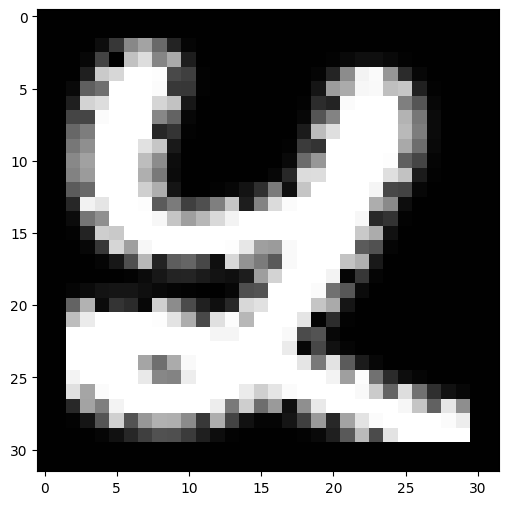

5


In [3]:
x_example, y_example = train_dataset[8886]

print( x_example.shape )

x_img = transforms.ToPILImage()(x_example)

plt.figure( figsize = (6,6) )
plt.imshow( x_img, cmap='gray', interpolation='nearest' )
plt.show()

print( y_example )

In [4]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

batch_size = 32

input_channels = 1

classes = 10

filters = 16

kernel_size = 3

padding = kernel_size//2

pool_size = 2

original_pixels_per_channel = 32*32

In [5]:
loss_func = nn.CrossEntropyLoss()

train_loader = DataLoader( train_dataset, batch_size=batch_size, shuffle=True )

test_loader = DataLoader( test_dataset, batch_size=batch_size )

<div style="background-color:white">
    <img src="arch_imgs/One_Conv_No_BN.png" width="35%" height="35%"/>
</div>

In [6]:
one_conv_model = nn.Sequential(
                                nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                nn.ReLU(inplace=True), #16x32x32 => 16x32x32
    
                                nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
    
                                nn.Flatten(), # 16x16x16 => 4096
                                nn.Linear( 4096, classes) # 4096 => 10
                            )

In [7]:
one_conv_model_results_df = train_model( 
                                            one_conv_model,
                                            loss_func, 
                                            train_loader, 
                                            test_loader=test_loader, 
                                            score_funcs={'accuracy': accuracy_score}, 
                                            device=device, 
                                            epochs=30,
                                            capture_conv_sample_weights=True, 
                                            conv_index=0, 
                                            wx_bt_index=2, 
                                            wx_ch_index=0, 
                                            wx_ro_index=1, 
                                            wx_index=1,
                                            wy_bt_index=2,
                                            wy_ch_index=0, 
                                            wy_ro_index=2, 
                                            wy_index=2
                                    )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [07:44<00:00, 15.50s/it]


<div style="background-color:white">
    <img src="arch_imgs/One_Conv_Wth_BN.png" width="35%" height="35%"/>
</div>

In [8]:
one_conv_wth_bn_model = nn.Sequential(
                                        nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                        nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                        nn.ReLU(inplace=True), #16x32x32 => 16x32x32
            
                                        nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
            
                                        nn.Flatten(), # 16x16x16 => 4096
                                        nn.Linear( 4096, classes) # 4096 => 10
                                    )

In [9]:
one_conv_wth_bn_model_results_df = train_model( 
                                                    one_conv_wth_bn_model,
                                                    loss_func, 
                                                    train_loader, 
                                                    test_loader=test_loader, 
                                                    score_funcs={'accuracy': accuracy_score}, 
                                                    device=device, 
                                                    epochs=30,
                                                    capture_conv_sample_weights=True, 
                                                    conv_index=0, 
                                                    wx_bt_index=2, 
                                                    wx_ch_index=0, 
                                                    wx_ro_index=1, 
                                                    wx_index=1,
                                                    wy_bt_index=2,
                                                    wy_ch_index=0, 
                                                    wy_ro_index=2, 
                                                    wy_index=2
                                            )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [07:43<00:00, 15.45s/it]


In [10]:
print( "One Conv No BN Model Test Accuracy: {}".format( one_conv_model_results_df[ 'test accuracy' ].iloc[-1] ) )
print( "One Conv With BN Model Test Accuracy: {}".format( one_conv_wth_bn_model_results_df[ 'test accuracy' ].iloc[-1] ) )

One Conv No BN Model Test Accuracy: 0.9616666666666667
One Conv With BN Model Test Accuracy: 0.9836666666666667


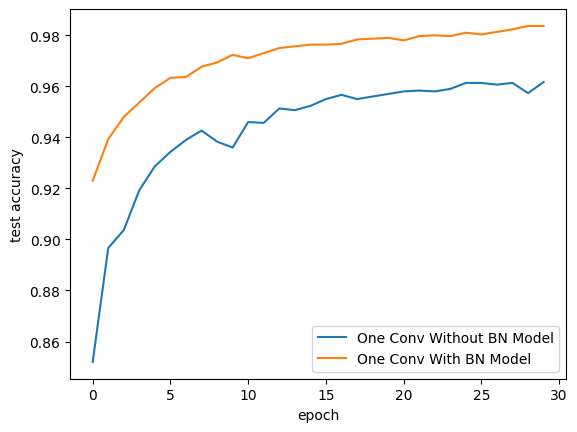

In [28]:
sns.lineplot( x='epoch', y='test accuracy', data=one_conv_model_results_df, label="One Conv Without BN Model" )
sns.lineplot( x='epoch', y='test accuracy', data=one_conv_wth_bn_model_results_df, label="One Conv With BN Model" )
plt.savefig( 'imgs/one_conv_test_accuracy_plots.png' )

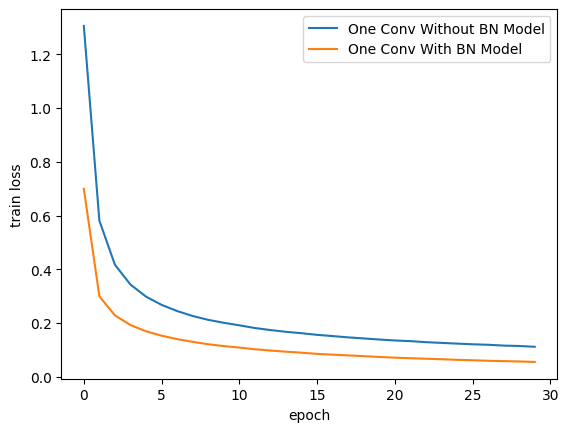

In [29]:
sns.lineplot( x='epoch', y='train loss', data=one_conv_model_results_df, label="One Conv Without BN Model" )
sns.lineplot( x='epoch', y='train loss', data=one_conv_wth_bn_model_results_df, label="One Conv With BN Model" )
plt.savefig( 'imgs/one_conv_training_convergence_plots.png' )

In [13]:
one_conv_wth_bn_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,14.186295,0.699786,-0.173446,-0.058926,0.351768,0.842588,0.923000
1,1,27.698341,0.299925,-0.172907,-0.060028,0.249624,0.933000,0.939333
2,2,41.366558,0.228700,-0.172468,-0.060637,0.209116,0.947882,0.948000
3,3,54.886796,0.192737,-0.172093,-0.061066,0.183337,0.955118,0.953667
4,4,68.226877,0.169621,-0.171729,-0.061336,0.161750,0.960706,0.959333


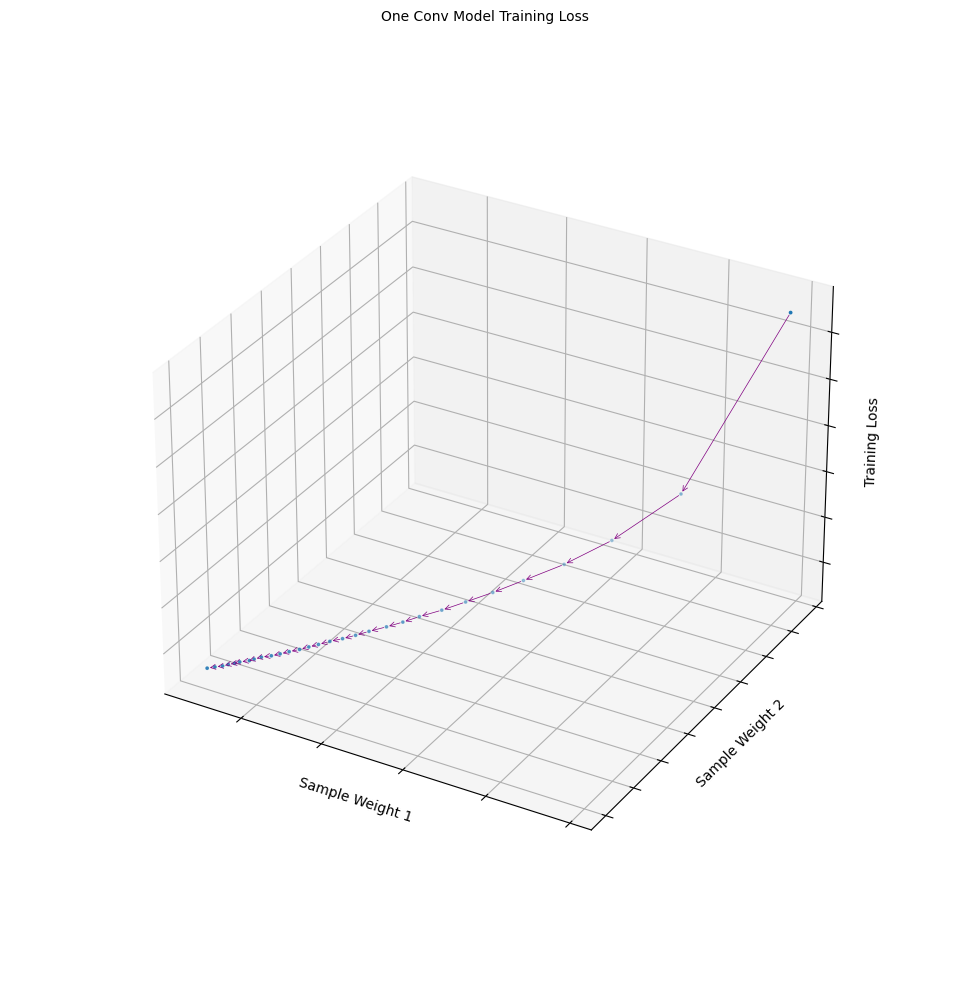

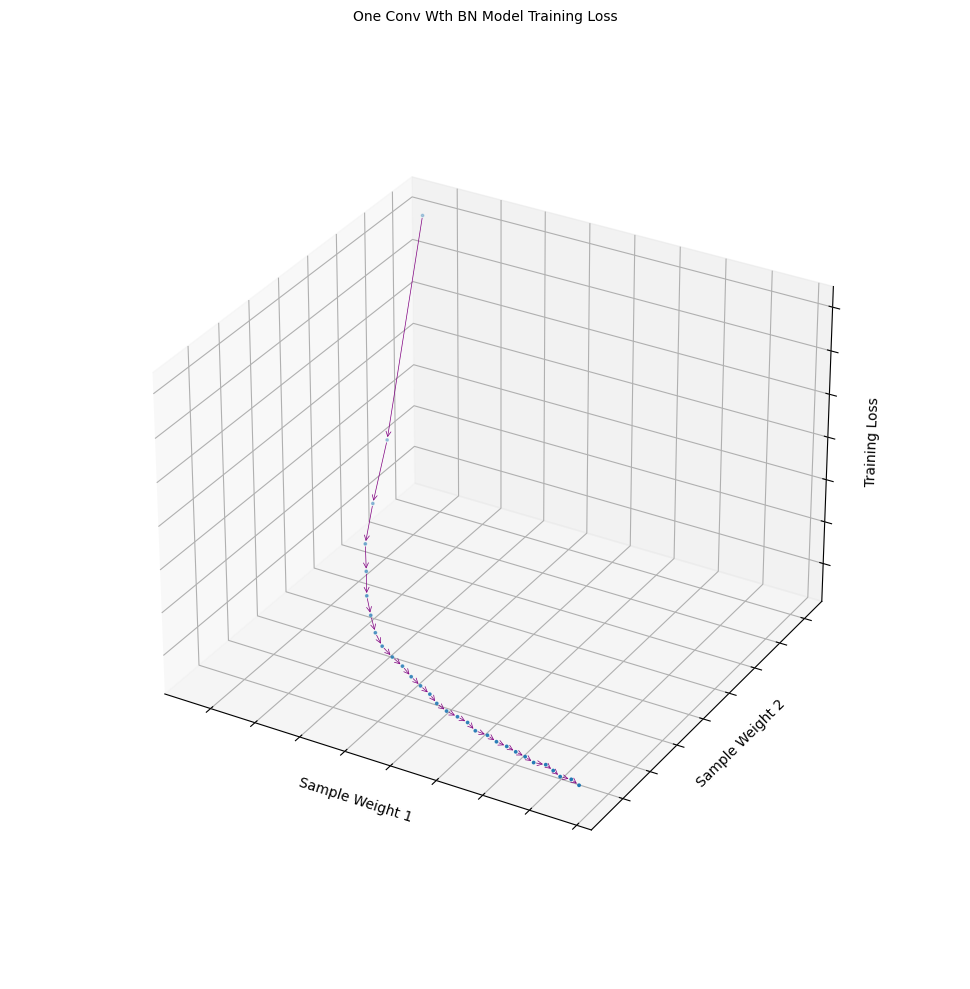

In [14]:
fig = draw_loss_descent( one_conv_model_results_df, title='One Conv Model Training Loss' )
fig.savefig( 'imgs/one_conv_model_contour.png' )

fig = draw_loss_descent( one_conv_wth_bn_model_results_df, title='One Conv Wth BN Model Training Loss' )
fig.savefig( 'imgs/one_conv_wth_bn_model_contour.png' )

<div style="background-color:white">
    <img src="arch_imgs/Three_Convs_No_BN.png" width="35%" height="35%"/>
</div>

In [15]:
three_convs_model = nn.Sequential(
                                    nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
        
                                    nn.Flatten(), # 16x16x16 => 4096
                                    nn.Linear( 4096, classes) # 1024 => 10
                                )

In [16]:
three_convs_model_results_df = train_model( 
                                            three_convs_model,
                                            loss_func, 
                                            train_loader, 
                                            test_loader=test_loader, 
                                            score_funcs={'accuracy': accuracy_score}, 
                                            device=device, 
                                            epochs=30,
                                            capture_conv_sample_weights=True, 
                                            conv_index=4, 
                                            wx_bt_index=3, 
                                            wx_ch_index=4, 
                                            wx_ro_index=1, 
                                            wx_index=0,
                                            wy_bt_index=3,
                                            wy_ch_index=4, 
                                            wy_ro_index=2, 
                                            wy_index=2
                                         )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [09:26<00:00, 18.89s/it]


In [17]:
three_convs_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,16.525898,2.291373,0.056085,0.031871,2.275427,0.257176,0.421000
1,1,33.063182,2.186457,0.062149,0.033379,1.908154,0.595706,0.762667
2,2,49.489765,0.888632,0.074885,0.038504,0.382380,0.831647,0.893333
3,3,65.898913,0.324572,0.076984,0.040246,0.273489,0.907647,0.913000
4,4,82.842762,0.250095,0.077963,0.041178,0.228735,0.926294,0.932000


<div style="background-color:white">
    <img src="arch_imgs/Three_Convs_Wth_BN.png" width="35%" height="35%"/>
</div>

In [18]:
three_convs_wth_bn_model = nn.Sequential(
                                            nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
                
                                            nn.Flatten(), # 16x16x16 => 4096
                                            nn.Linear( 4096, classes) # 4096 => 10
                                    )

In [19]:
three_convs_wth_bn_model_results_df = train_model( 
                                                    three_convs_wth_bn_model,
                                                    loss_func, 
                                                    train_loader, 
                                                    test_loader=test_loader, 
                                                    score_funcs={'accuracy': accuracy_score}, 
                                                    device=device, 
                                                    epochs=30,
                                                    capture_conv_sample_weights=True, 
                                                    conv_index=6, 
                                                    wx_bt_index=3, 
                                                    wx_ch_index=4, 
                                                    wx_ro_index=1, 
                                                    wx_index=0,
                                                    wy_bt_index=3,
                                                    wy_ch_index=4, 
                                                    wy_ro_index=2, 
                                                    wy_index=2
                                                 )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [09:58<00:00, 19.95s/it]


In [20]:
three_convs_wth_bn_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,17.393235,0.572248,0.000192,0.034192,0.244076,0.866353,0.947333
1,1,34.877452,0.199552,0.001369,0.034119,0.158868,0.957000,0.967667
2,2,52.219984,0.141072,0.002131,0.033922,0.124271,0.968941,0.974333
3,3,69.633470,0.111124,0.002717,0.033713,0.103460,0.975824,0.978667
4,4,87.480953,0.092668,0.003109,0.033589,0.090646,0.980353,0.982000


In [21]:
print( "Three Convs No BN Model Test Accuracy: {}".format( three_convs_model_results_df[ 'test accuracy' ].iloc[-1] ) )
print( "Three Convs With BN Model Test Accuracy: {}".format( three_convs_wth_bn_model_results_df[ 'test accuracy' ].iloc[-1] ) )

Three Convs No BN Model Test Accuracy: 0.9546666666666667
Three Convs With BN Model Test Accuracy: 0.9903333333333333


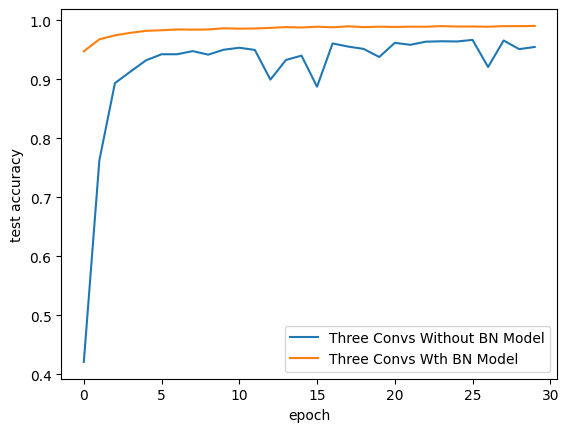

In [26]:
sns.lineplot( x='epoch', y='test accuracy', data=three_convs_model_results_df, label="Three Convs Without BN Model" )
sns.lineplot( x='epoch', y='test accuracy', data=three_convs_wth_bn_model_results_df, label="Three Convs Wth BN Model" )
plt.savefig( 'imgs/three_convs_test_accuracy_plots.png' )

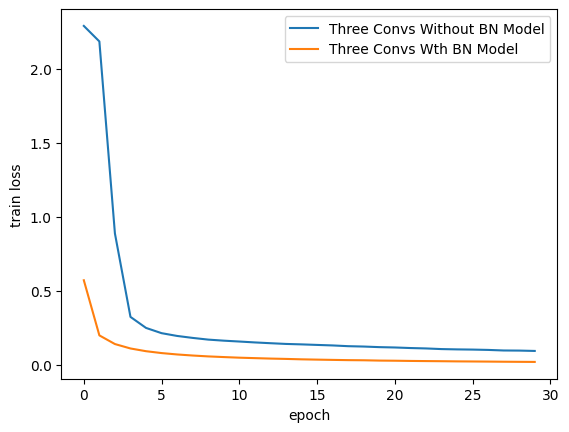

In [27]:
sns.lineplot( x='epoch', y='train loss', data=three_convs_model_results_df, label="Three Convs Without BN Model" )
sns.lineplot( x='epoch', y='train loss', data=three_convs_wth_bn_model_results_df, label="Three Convs Wth BN Model" )
plt.savefig( 'imgs/three_convs_training_convergence_plots.png' )

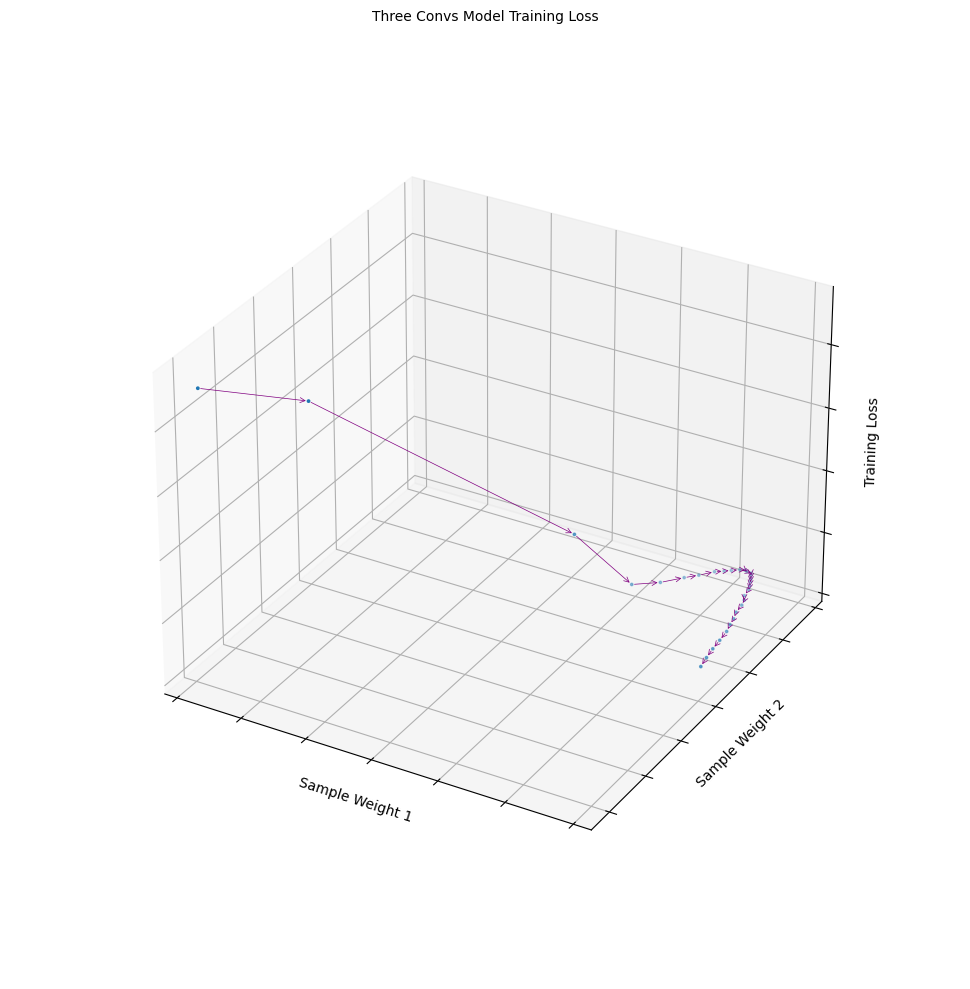

In [24]:
fig = draw_loss_descent( three_convs_model_results_df, title='Three Convs Model Training Loss' )
fig.savefig( 'imgs/three_convs_model_contour.png' )

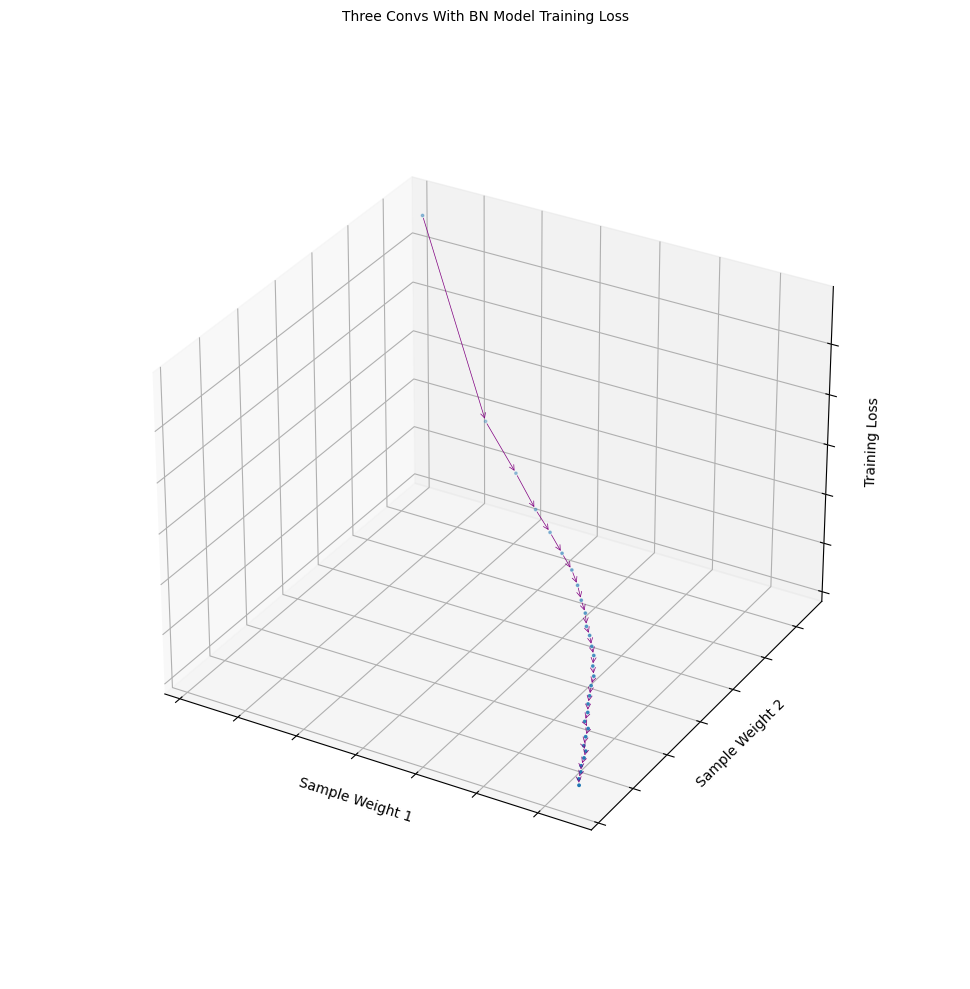

In [25]:
fig = draw_loss_descent( three_convs_wth_bn_model_results_df, title='Three Convs With BN Model Training Loss' )
fig.savefig( 'imgs/three_convs_wth_bn_model_contour.png' )